In [1]:
import os
import pyart
import shutil
import tempfile
from tint.tracks import Cell_tracks
from tint.visualization import animate, embed_mp4_as_gif
from glob import glob


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



### Grid Generator
Let's make a generator of pyart grids to use for tracking.

In [2]:
#filenames = glob('../inf_tutorial_data/tint_grids/*.nc')
filenames = glob('/home/mhpicel/arm/tint_shortcourse/data/*.nc')
filenames.sort()  # List of grid files in chronological order
grids = (pyart.io.read_grid(fn) for fn in filenames)

### Tracks Object
Now we can instantiate a tracks object and view the default tracking parameters.

In [3]:
tracks_obj = Cell_tracks()
tracks_obj.params

{'FIELD_THRESH': 32,
 'FLOW_MARGIN': 10000,
 'GS_ALT': 1500,
 'ISO_SMOOTH': 3,
 'ISO_THRESH': 8,
 'MAX_DISPARITY': 999,
 'MAX_FLOW_MAG': 50,
 'MAX_SHIFT_DISP': 15,
 'MIN_SIZE': 8,
 'SEARCH_MARGIN': 4000}

### Get Tracks
Let's adjust some of the parameters, and then get some tracks using the generator we made earlier.

In [4]:
tracks_obj.params['MIN_SIZE'] = 4
tracks_obj.get_tracks(grids)

Writing tracks for scan 0
Writing tracks for scan 1
Writing tracks for scan 2
Writing tracks for scan 3
Writing tracks for scan 4
Writing tracks for scan 5
Writing tracks for scan 6
Writing tracks for scan 7
Writing tracks for scan 8
Writing tracks for scan 9
Writing tracks for scan 10
Writing tracks for scan 11
Writing tracks for scan 12
Writing tracks for scan 13
Writing tracks for scan 14
Writing tracks for scan 15
Writing tracks for scan 16
Writing tracks for scan 17
Writing tracks for scan 18
Writing tracks for scan 19


time elapsed 0.0 minutes


The resulting tracks can be viewed as an attribute of the tracks object.

In [5]:
tracks_obj.tracks.head(10)

area   grid_x   grid_y isolated      lat      lon        max  \
scan uid                                                                      
0    0     6.050314  194.292  101.667    False  36.7164 -97.0309  42.798615   
     1    16.386268  204.923  104.646    False  36.7297 -96.9688  42.824799   
     2    10.083857  115.725  159.250     True  36.9745 -97.4703  38.954918   
     3     4.033543   56.500  163.500     True  36.9966 -97.8096  39.540504   
     4     9.327568   79.757  172.162     True  37.0330 -97.6740  41.786858   
1    5     6.554507  193.846   88.538    False  36.6577 -97.0312  39.220558   
     6     5.041929  197.700   94.550    False  36.6847 -97.0085  39.449768   
     0    10.335954  207.561   98.415    False  36.6980 -96.9521  42.553078   
     1    17.898846  219.451  101.930    False  36.7158 -96.8901  37.383907   
     7     4.285639   55.412  134.353     True  36.8611 -97.8146  37.425671   

           max_alt                time        vol  
scan uid                                           
0    0    3.090909 2011-05-25 18:33:34  11.298503  
     1    2.575758 2011-05-25 18:33:34  33.895510  
     2    2.060606 2011-05-25 18:33:34   9.610221  
     3    3.090909 2011-05-25 18:33:34   4.675243  
     4    2.575758 2011-05-25 18:33:34  10.908900  
1    5    3.090909 2011-05-25 18:41:16  10.259561  
     6    2.575758 2011-05-25 18:41:16   8.831014  
     0    2.575758 2011-05-25 18:41:16  23.246346  
     1    2.060606 2011-05-25 18:41:16  32.207228  
     7    2.575758 2011-05-25 18:41:16   3.636300

### Animate
Let's make an animation so we can get a better look at these tracks. The grid generator we made earlier is now exhausted, so we need to instantiate another one to give to the animate function.

In [6]:
grids = (pyart.io.read_grid(fn) for fn in filenames)  # new grid generator
dest_dir = tempfile.mkdtemp()  # Let's make a temporary location to save these outputs
anim_name = os.path.join(dest_dir, 'tracks_animation')  # join name for our animation to the path of the temp directory
cmap = pyart.graph.cm.LangRainbow12  # We'll use this colormap
animate(tracks_obj, grids, anim_name, cmap=cmap)  # give everything to the animate function

Animating 20 frames
Frame: 0
Frame: 1
Frame: 2
Frame: 3
Frame: 4
Frame: 5
Frame: 6
Frame: 7
Frame: 8
Frame: 9
Frame: 10
Frame: 11
Frame: 12
Frame: 13
Frame: 14
Frame: 15
Frame: 16
Frame: 17
Frame: 18
Frame: 19


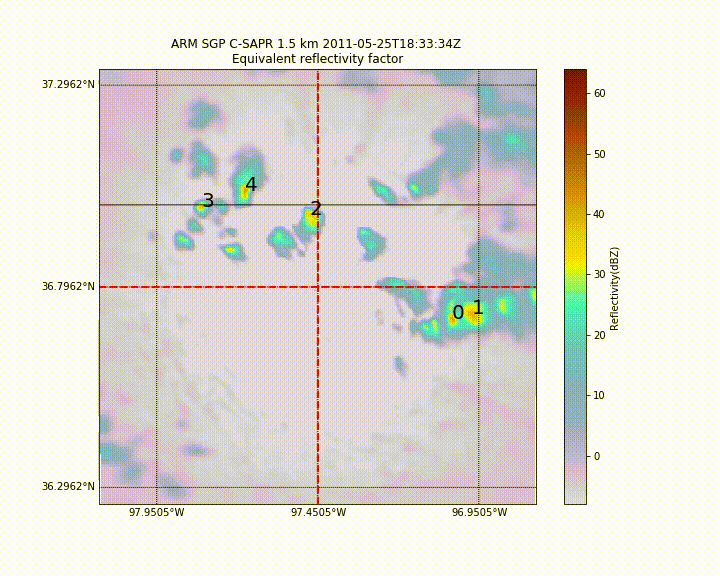

In [7]:
embed_mp4_as_gif(anim_name + '.mp4')  # now we can embed our animation

### LaGrangian View
Cell 18 looks interesting. We can get a better look at it by plotting it from a LaGrangian perspective.

In [8]:
grids = (pyart.io.read_grid(fn) for fn in filenames)  # new grid generator
anim_name_lagr = os.path.join(dest_dir, 'lagrangian_anim')
animate(tracks_obj, grids, anim_name_lagr, style='lagrangian', uid='17', cmap=cmap)

Animating 5 frames
Frame: 0
Frame: 1
Frame: 2
Frame: 3
Frame: 4


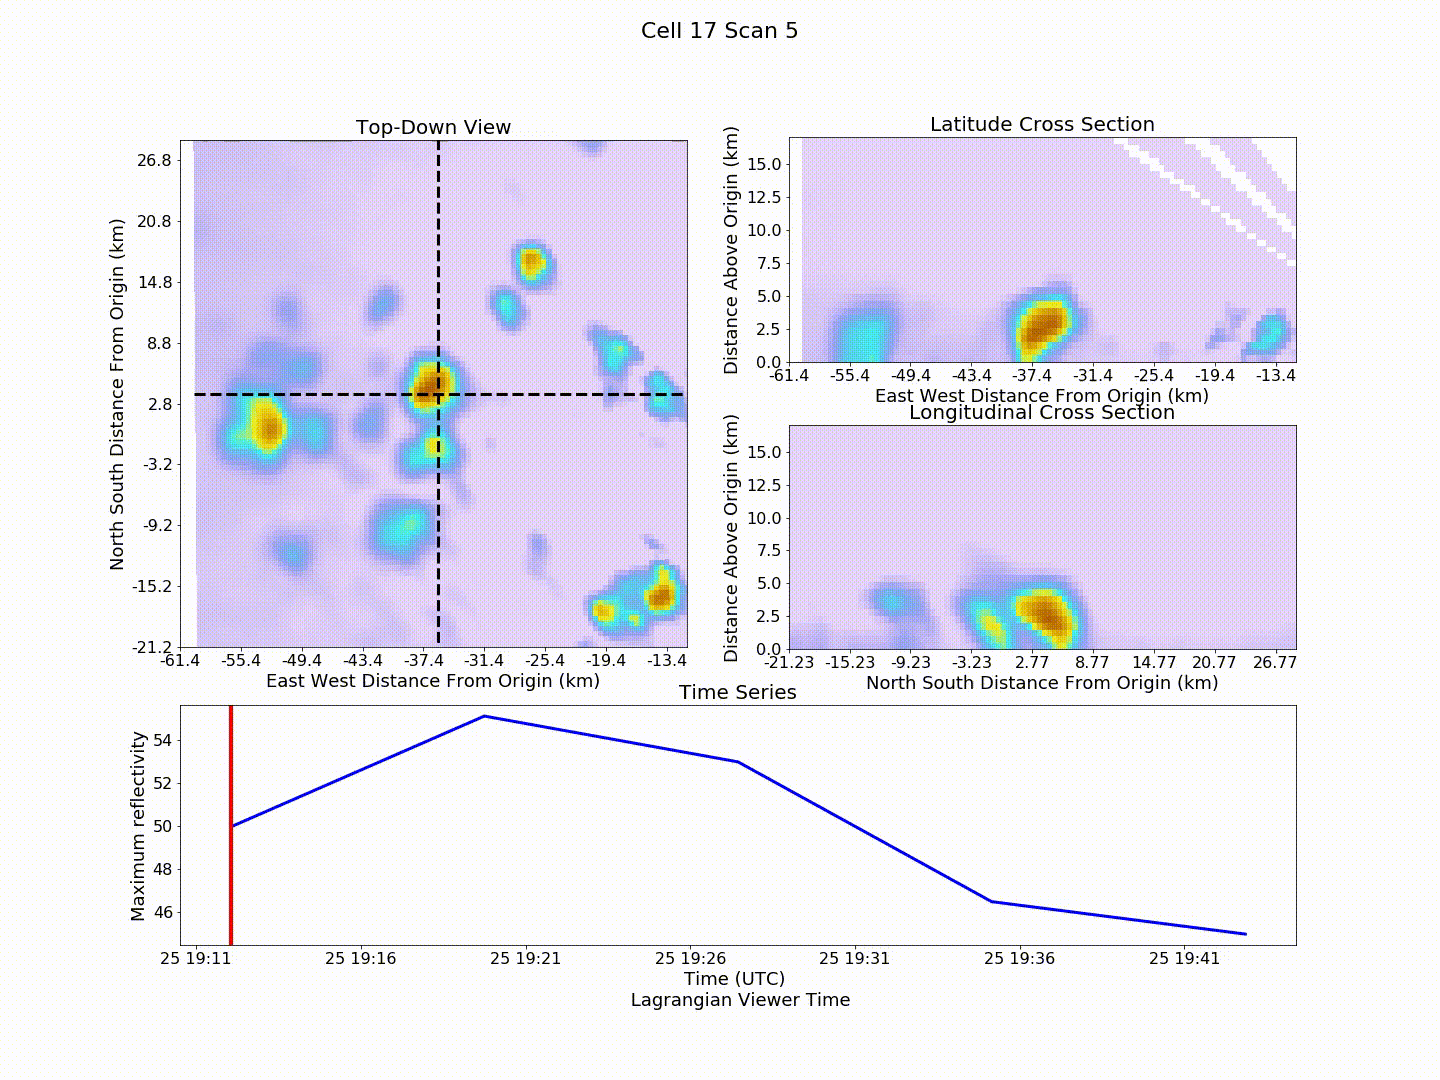

In [9]:
embed_mp4_as_gif(anim_name_lagr + '.mp4')

### Quick Queries and Plots
We can query the tracks dataframe for useful information.

Which cells were tracked for the most frames?

In [10]:
tracks_obj.tracks.groupby(level='uid').size().sort_values(ascending=False)[:10]

uid
26    12
16     7
46     7
28     7
33     6
3      6
21     6
25     6
10     5
44     5
dtype: int64

When did cell 26 reach its largest volume?

In [11]:
tracks_obj.tracks.xs('26', level='uid')['vol'].argmax()

15

Let's look at the rest of that cell's properties in scan 15.

In [12]:
tracks_obj.tracks.loc[(15, '26')]

area                    53.6965
grid_x                  162.141
grid_y                   74.864
isolated                  False
lat                      36.595
lon                    -97.2115
max                     51.1984
max_alt                 3.60606
time        2011-05-25 20:29:02
vol                     122.465
Name: (15, 26), dtype: object

We can take a quick look at the area of that cell throughout its lifetime.

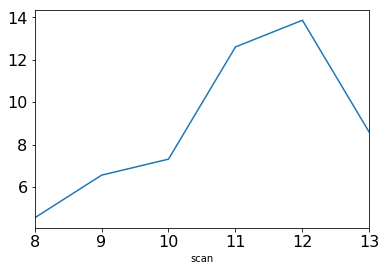

In [13]:
%matplotlib inline  
tracks_obj.tracks.xs('25', level='uid')['area'].plot()

### Tracers!
You can also add tracers to your animations.

Animating 20 frames
Frame: 0
Frame: 1
Frame: 2
Frame: 3
Frame: 4
Frame: 5
Frame: 6
Frame: 7
Frame: 8
Frame: 9
Frame: 10
Frame: 11
Frame: 12
Frame: 13
Frame: 14
Frame: 15
Frame: 16
Frame: 17
Frame: 18
Frame: 19


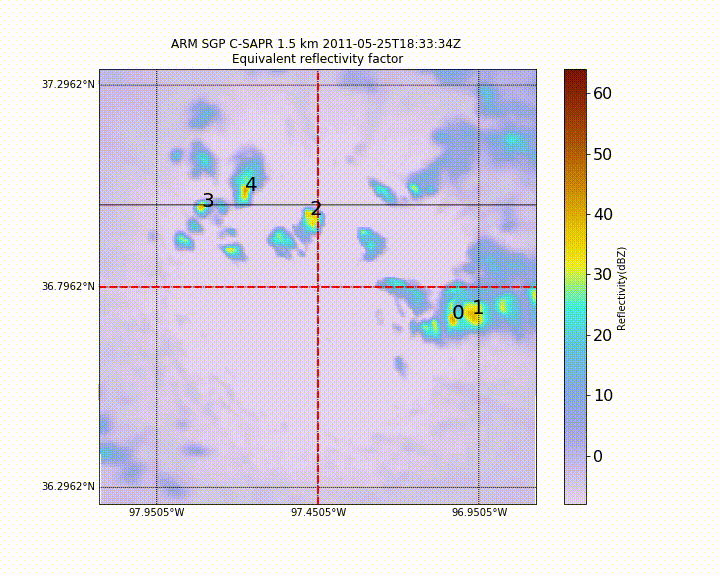

In [14]:
grids = (pyart.io.read_grid(fn) for fn in filenames)  # new grid generator
tracer_anim_name = os.path.join(dest_dir, 'tracer_animation')  # name
animate(tracks_obj, grids, tracer_anim_name, tracers=True, persist=False, cmap=cmap) # persist is false by defualt
embed_mp4_as_gif(tracer_anim_name + '.mp4')

### Exercise
Make another tracks object, but reduce the FIELD_THRESH parameter to 28 before you add tracks to it. Then, identify the cell with the largest area in the scan containing the most tracked cells. Good luck, have fun!

(If you really get stuck, here's some helpful pandas documentation: https://pandas.pydata.org/pandas-docs/stable/indexing.html)

In [ ]:
tobj2 = Cell_tracks()

### Cleanup
Run this cell to clear the output directory

In [ ]:
shutil.rmtree(dest_dir)
print('temporary directory removed.')